<a href="https://colab.research.google.com/github/Ziedny28/PCVK-Ganjil-2023/blob/main/week-11/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Metode yang digunakan:

1. Templaate Matcing
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour detection

In [1]:
# import liblary

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# akses drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Nomor 2

Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

Menggunakan library openCV:
cv.matchTemplate(), dengan parameter:
- image: citra input
- templ: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
- method: metode dari template matching

Jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

In [3]:
main_image_url = '/content/drive/My Drive/pcvk-resources/cats_and_bunnies.jpg'
template_image_url ='/content/drive/My Drive/pcvk-resources/cat2_templatejpg.jpg'

# Load the main image and the template
main_image = cv.imread(main_image_url)
template = cv.imread(template_image_url)

In [4]:
def getTM(main_image,template, function,title):

  main_cop = main_image.copy()

  # Convert images to grayscale
  main_gray = cv.cvtColor(main_cop, cv.COLOR_BGR2GRAY)
  template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

  # Match the template using TM_SQDIFF
  result = cv.matchTemplate(main_gray, template_gray, function)

  # Find the location of the best match
  min_val, _, min_loc, _ = cv.minMaxLoc(result)

  # Draw a rectangle around the matched area
  h, w = template_gray.shape
  top_left = min_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(main_cop, top_left, bottom_right, (0, 255, 0), 2)

  showTM(main_cop, result, title)


def showTM(main_image, result, title):

    # Display the result using plt
    plt.figure(figsize=(12, 3))

    plt.subplot(131), plt.imshow(main_image[:, :, ::-1]), plt.title('Main Image')
    plt.subplot(132), plt.imshow(result, cmap='gray'), plt.title('Matching Result')

    plt.suptitle(title, y=1.02, fontsize=16)

    plt.show()


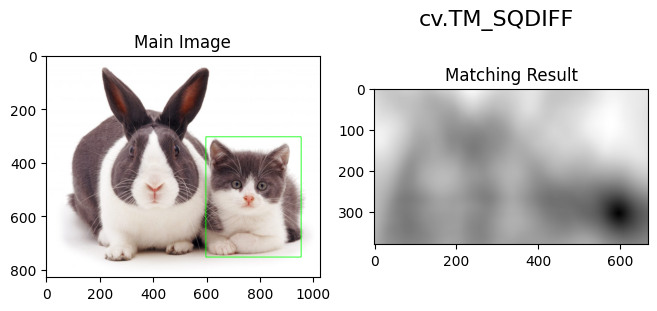

In [5]:
getTM(main_image, template, cv.TM_SQDIFF, "cv.TM_SQDIFF")

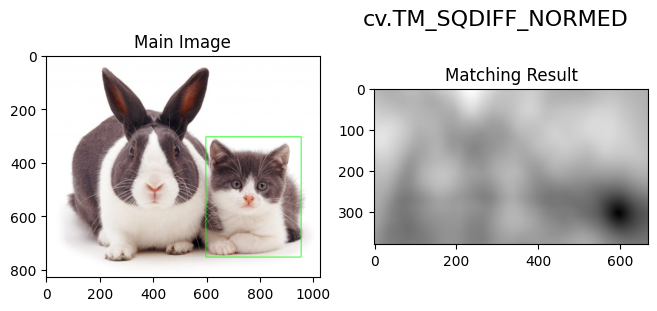

In [6]:
getTM(main_image, template, cv.TM_SQDIFF_NORMED, "cv.TM_SQDIFF_NORMED")

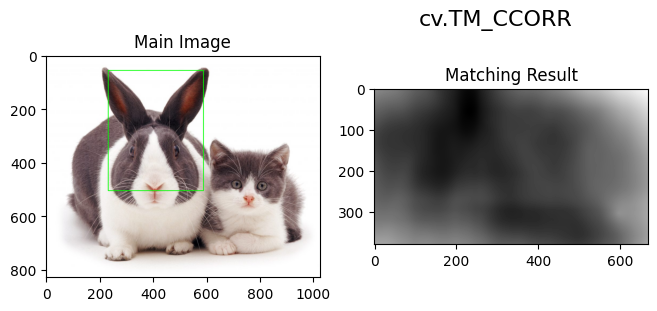

In [7]:
getTM(main_image, template, cv.TM_CCORR, "cv.TM_CCORR")

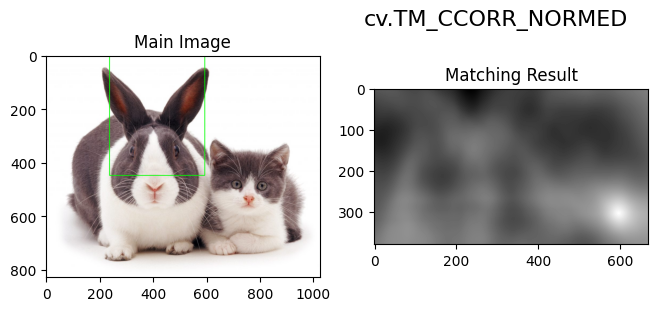

In [8]:
getTM(main_image, template, cv.TM_CCORR_NORMED, "cv.TM_CCORR_NORMED")

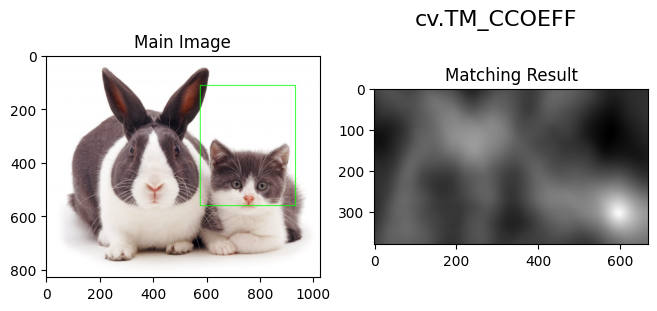

In [9]:
getTM(main_image, template, cv.TM_CCOEFF, "cv.TM_CCOEFF")

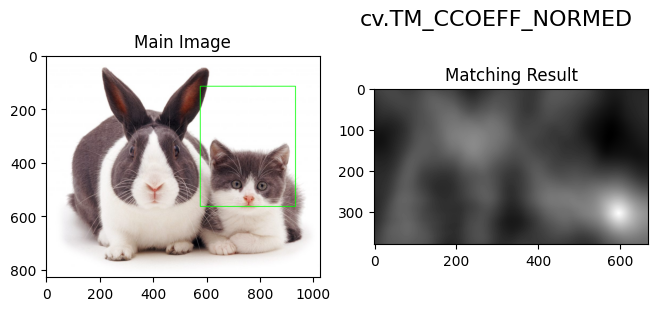

In [10]:
getTM(main_image, template, cv.TM_CCOEFF_NORMED, "cv.TM_CCOEFF_NORMED")

## Nomor 3

Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg

In [11]:
from skimage.feature import match_template

In [37]:
bahrain_url = '/content/drive/My Drive/pcvk-resources/bahrain.jpg'
bahrain_template_url ='/content/drive/My Drive/pcvk-resources/bahrain-template.jpg'

# Load the main image and the template
bahrain_image = cv.imread(bahrain_url)
bahrain_template = cv.imread(bahrain_template_url)

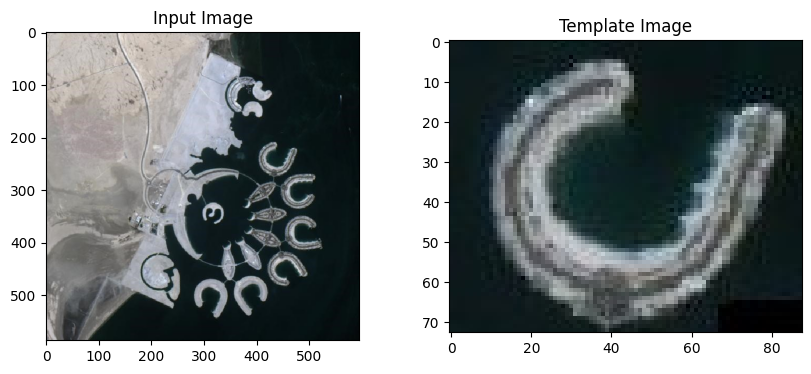

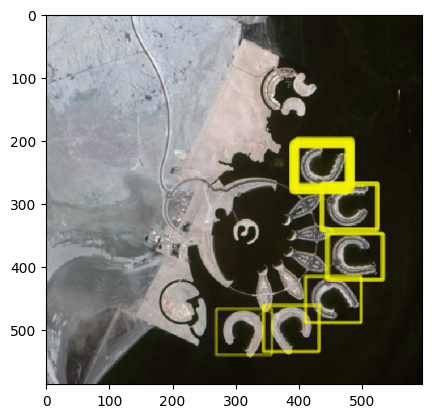

In [43]:
figure, axis_arr = plt.subplots(1, 2, figsize=(10, 4))  # Create 2 plots for input and template images
axis_arr[0].imshow(cv.cvtColor(bahrain_image, cv.COLOR_BGR2RGB)), axis_arr[0].set_title("Input Image")
axis_arr[1].imshow(cv.cvtColor(bahrain_template, cv.COLOR_BGR2RGB)), axis_arr[1].set_title("Template Image")

# Library for matching multiple similar images
from skimage.feature import match_template

# Compute the similarity of the images with the template image
result = match_template(bahrain_image, bahrain_template)

# Set a threshold to determine the matching result
threshold = 0.45  # Set a threshold to determine the matching result
locations = np.where(result >= threshold)

# Plot the matching result
fig, ax = plt.subplots()
ax.imshow(bahrain_image, cmap=plt.cm.gray)
height, width,_ = bahrain_template.shape

# Unpack only the necessary values from locations
for y, x in zip(locations[0], locations[1]):  # Iterate through each found location
    rectangle = plt.Rectangle((x, y), width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rectangle)

plt.show()


## Nomor 4

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan LaplacianEdge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

In [23]:
park_image_url = '/content/drive/My Drive/pcvk-resources/car-park.jpg'
prak_image = cv.imread(park_image_url)
prak_image = cv.cvtColor(prak_image, cv.COLOR_BGR2GRAY)


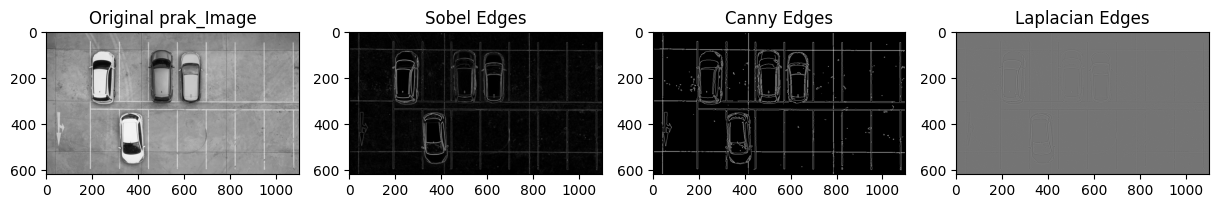

In [25]:
# Sobel Edge Detection
sobel_x = cv.Sobel(prak_image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(prak_image, cv.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Canny Edge Detection
canny_edges = cv.Canny(prak_image, 100, 200)

# Laplacian Edge Detection
laplacian_edges = cv.Laplacian(prak_image, cv.CV_64F)

# Display the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1), plt.imshow(prak_image, cmap='gray'), plt.title('Original prak_Image')
plt.subplot(1, 4, 2), plt.imshow(sobel_edges, cmap='gray'), plt.title('Sobel Edges')
plt.subplot(1, 4, 3), plt.imshow(canny_edges, cmap='gray'), plt.title('Canny Edges')
plt.subplot(1, 4, 4), plt.imshow(laplacian_edges, cmap='gray'), plt.title('Laplacian Edges')

plt.show()

## Nomor 5

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection

In [28]:
chess_image_url = '/content/drive/My Drive/pcvk-resources/chess-board.jpg'
chess_image = cv.imread(chess_image_url)
gray_chess_image = cv.cvtColor(chess_image, cv.COLOR_BGR2GRAY)

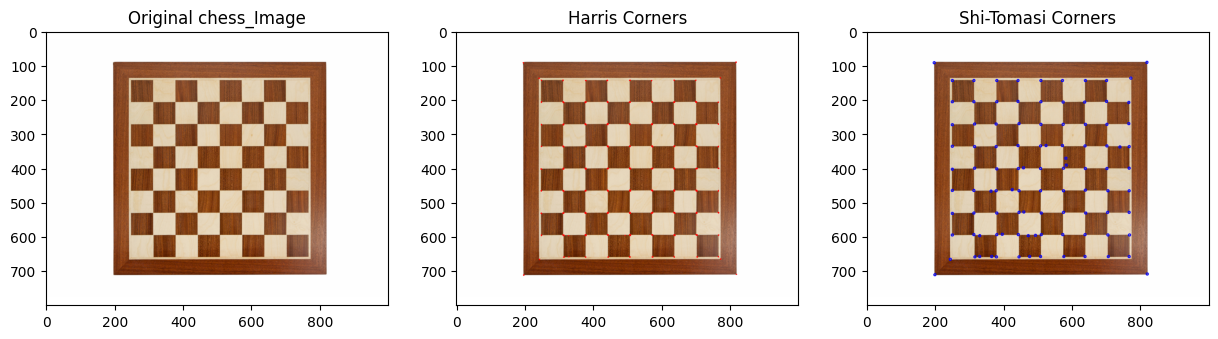

In [36]:
# Harris Corner Detection
harris_corners = cv.cornerHarris(gray_chess_image, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)

# Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray_chess_image, maxCorners=25, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Draw Harris corners on the chess_image
chess_image_harris = chess_image.copy()
chess_image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Draw Shi-Tomasi corners on the chess_image
chess_image_shi_tomasi = chess_image.copy()
chess_image_shi_tomasi = cv.cvtColor(chess_image_shi_tomasi, cv.COLOR_BGR2RGB)

corners = cv.goodFeaturesToTrack(gray_chess_image, 100, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(chess_image_shi_tomasi, (x, y), 3, (0, 0, 255), 2)  # Change color to blue

# Display the results
plt.figure(figsize=(15, 6))

plt.subplot(131), plt.imshow(cv.cvtColor(chess_image, cv.COLOR_BGR2RGB)), plt.title('Original chess_Image')
plt.subplot(132), plt.imshow(cv.cvtColor(chess_image_harris, cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Harris Corners')
plt.subplot(133), plt.imshow(chess_image_shi_tomasi, cmap='gray'), plt.title('Shi-Tomasi Corners')

plt.show()

## Nomor 6

Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori,